Tingkat kebahagiaan pelanggan: 7.74


C:\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


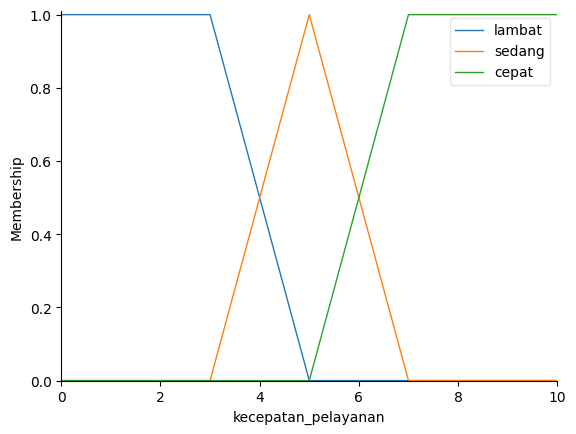

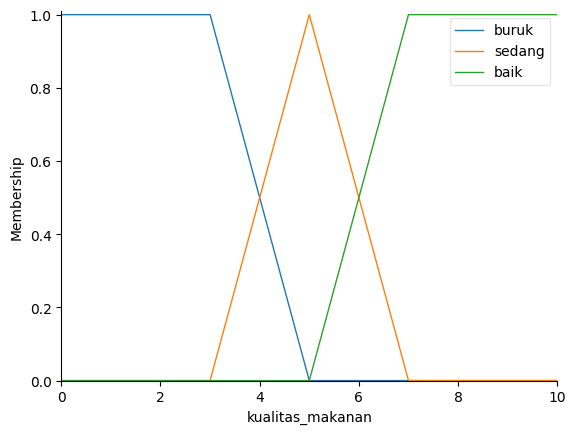

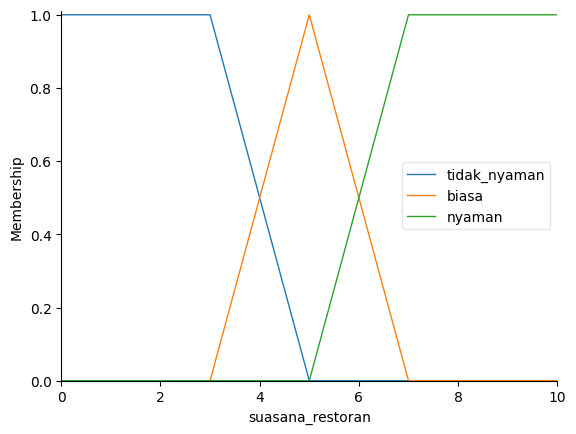

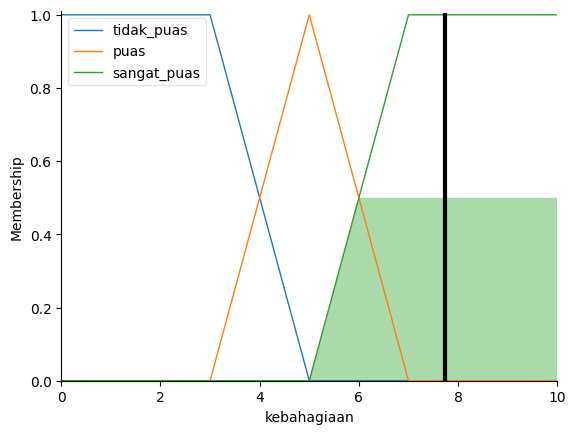

In [1]:
# Instalasi pustaka (jalankan jika belum terinstal)
# !pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definisi variabel fuzzy
kecepatan_pelayanan = ctrl.Antecedent(np.arange(0, 11, 1), 'kecepatan_pelayanan')
kualitas_makanan = ctrl.Antecedent(np.arange(0, 11, 1), 'kualitas_makanan')
suasana_restoran = ctrl.Antecedent(np.arange(0, 11, 1), 'suasana_restoran')
kebahagiaan = ctrl.Consequent(np.arange(0, 11, 1), 'kebahagiaan')

# Fungsi keanggotaan fuzzy untuk variabel input
kecepatan_pelayanan['lambat'] = fuzz.trapmf(kecepatan_pelayanan.universe, [0, 0, 3, 5])
kecepatan_pelayanan['sedang'] = fuzz.trimf(kecepatan_pelayanan.universe, [3, 5, 7])
kecepatan_pelayanan['cepat'] = fuzz.trapmf(kecepatan_pelayanan.universe, [5, 7, 10, 10])

kualitas_makanan['buruk'] = fuzz.trapmf(kualitas_makanan.universe, [0, 0, 3, 5])
kualitas_makanan['sedang'] = fuzz.trimf(kualitas_makanan.universe, [3, 5, 7])
kualitas_makanan['baik'] = fuzz.trapmf(kualitas_makanan.universe, [5, 7, 10, 10])

suasana_restoran['tidak_nyaman'] = fuzz.trapmf(suasana_restoran.universe, [0, 0, 3, 5])
suasana_restoran['biasa'] = fuzz.trimf(suasana_restoran.universe, [3, 5, 7])
suasana_restoran['nyaman'] = fuzz.trapmf(suasana_restoran.universe, [5, 7, 10, 10])

# Fungsi keanggotaan fuzzy untuk variabel output
kebahagiaan['tidak_puas'] = fuzz.trapmf(kebahagiaan.universe, [0, 0, 3, 5])
kebahagiaan['puas'] = fuzz.trimf(kebahagiaan.universe, [3, 5, 7])
kebahagiaan['sangat_puas'] = fuzz.trapmf(kebahagiaan.universe, [5, 7, 10, 10])

# Menentukan aturan fuzzy (rules)
rule1 = ctrl.Rule(kecepatan_pelayanan['lambat'] | kualitas_makanan['buruk'] | suasana_restoran['tidak_nyaman'], kebahagiaan['tidak_puas'])
rule2 = ctrl.Rule(kecepatan_pelayanan['sedang'] & kualitas_makanan['sedang'] & suasana_restoran['biasa'], kebahagiaan['puas'])
rule3 = ctrl.Rule(kecepatan_pelayanan['cepat'] & kualitas_makanan['baik'] & suasana_restoran['nyaman'], kebahagiaan['sangat_puas'])

# Membuat sistem kontrol fuzzy
kebahagiaan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
kebahagiaan_simulasi = ctrl.ControlSystemSimulation(kebahagiaan_ctrl)

# Memberikan input untuk simulasi
kebahagiaan_simulasi.input['kecepatan_pelayanan'] = 8  # Nilai kecepatan pelayanan
kebahagiaan_simulasi.input['kualitas_makanan'] = 7    # Nilai kualitas makanan
kebahagiaan_simulasi.input['suasana_restoran'] = 6    # Nilai suasana restoran

# Menjalankan simulasi
kebahagiaan_simulasi.compute()

# Menampilkan hasil output
print(f"Tingkat kebahagiaan pelanggan: {kebahagiaan_simulasi.output['kebahagiaan']:.2f}")

# Visualisasi hasil
kecepatan_pelayanan.view()
kualitas_makanan.view()
suasana_restoran.view()
kebahagiaan.view(sim=kebahagiaan_simulasi)


Tingkat Kebahagiaan Pelanggan: 7.000000000000002


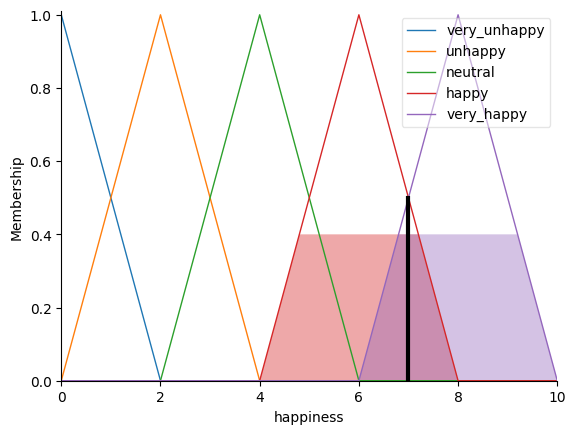

In [3]:
#Buat sistem untuk menilai tingkat kebahagiaan pelanggan berdasarkan parameter seperti kecepatan pelayanan, kualitas makanan, dan suasana restoran

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Definisikan Variabel Fuzzy
# Input variables: Kecepatan Pelayanan (speed), Kualitas Makanan (food_quality), Suasana Restoran (ambiance)
speed = ctrl.Antecedent(np.arange(0, 11, 1), 'speed')  # Kecepatan pelayanan (0 - 10)
food_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'food_quality')  # Kualitas makanan (0 - 10)
ambiance = ctrl.Antecedent(np.arange(0, 11, 1), 'ambiance')  # Suasana restoran (0 - 10)

# Output variable: Kebahagiaan Pelanggan (happiness)
happiness = ctrl.Consequent(np.arange(0, 11, 1), 'happiness')  # Kebahagiaan (0 - 10)

# 2. Definisikan Himpunan Fuzzy untuk setiap variabel
# Kecepatan Pelayanan
speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 5])
speed['medium'] = fuzz.trimf(speed.universe, [0, 5, 10])
speed['fast'] = fuzz.trimf(speed.universe, [5, 10, 10])

# Kualitas Makanan
food_quality['poor'] = fuzz.trimf(food_quality.universe, [0, 0, 5])
food_quality['average'] = fuzz.trimf(food_quality.universe, [0, 5, 10])
food_quality['excellent'] = fuzz.trimf(food_quality.universe, [5, 10, 10])

# Suasana Restoran
ambiance['unpleasant'] = fuzz.trimf(ambiance.universe, [0, 0, 5])
ambiance['neutral'] = fuzz.trimf(ambiance.universe, [0, 5, 10])
ambiance['pleasant'] = fuzz.trimf(ambiance.universe, [5, 10, 10])

# Kebahagiaan Pelanggan
happiness['very_unhappy'] = fuzz.trimf(happiness.universe, [0, 0, 2])
happiness['unhappy'] = fuzz.trimf(happiness.universe, [0, 2, 4])
happiness['neutral'] = fuzz.trimf(happiness.universe, [2, 4, 6])
happiness['happy'] = fuzz.trimf(happiness.universe, [4, 6, 8])
happiness['very_happy'] = fuzz.trimf(happiness.universe, [6, 8, 10])

# 3. Definisikan Aturan Fuzzy (Rules)
rule1 = ctrl.Rule(speed['slow'] & food_quality['poor'] & ambiance['unpleasant'], happiness['very_unhappy'])
rule2 = ctrl.Rule(speed['slow'] & food_quality['poor'] & ambiance['neutral'], happiness['unhappy'])
rule3 = ctrl.Rule(speed['slow'] & food_quality['poor'] & ambiance['pleasant'], happiness['neutral'])
rule4 = ctrl.Rule(speed['slow'] & food_quality['average'] & ambiance['unpleasant'], happiness['unhappy'])
rule5 = ctrl.Rule(speed['slow'] & food_quality['average'] & ambiance['neutral'], happiness['neutral'])
rule6 = ctrl.Rule(speed['slow'] & food_quality['average'] & ambiance['pleasant'], happiness['happy'])
rule7 = ctrl.Rule(speed['slow'] & food_quality['excellent'] & ambiance['pleasant'], happiness['very_happy'])
rule8 = ctrl.Rule(speed['fast'] & food_quality['excellent'] & ambiance['pleasant'], happiness['very_happy'])
rule9 = ctrl.Rule(speed['fast'] & food_quality['excellent'] & ambiance['neutral'], happiness['happy'])
rule10 = ctrl.Rule(speed['fast'] & food_quality['average'] & ambiance['pleasant'], happiness['happy'])
rule11 = ctrl.Rule(speed['fast'] & food_quality['poor'] & ambiance['pleasant'], happiness['neutral'])

# 4. Buat Sistem Kontrol Fuzzy
happiness_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
happiness_simulator = ctrl.ControlSystemSimulation(happiness_ctrl)

# 5. Simulasikan Sistem dengan inputan
happiness_simulator.input['speed'] = 7  # Kecepatan pelayanan
happiness_simulator.input['food_quality'] = 8  # Kualitas makanan
happiness_simulator.input['ambiance'] = 9  # Suasana restoran

# 6. Proses dan tampilkan output
happiness_simulator.compute()
print(f'Tingkat Kebahagiaan Pelanggan: {happiness_simulator.output["happiness"]}')

# Visualisasi output
happiness.view(sim=happiness_simulator)

plt.show()
